# Project: Titanic - Machine Learning from Disaster

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
train_df=pd.read_csv("./data/train.csv") 
test_df=pd.read_csv("./data/test.csv")

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Notes: 
* SibSp: # of siblings
* Parch: # of parents/children
* Ticket: ticket number
* Cabin: cabin number

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.drop('PassengerId', axis=1, inplace = True)

In [10]:
test_df = pd.read_csv('./data/test.csv', index_col="PassengerId")

In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical vs Numerical

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [14]:
train_df["Survived"]=train_df["Survived"].astype("category")

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [16]:
features = ["Pclass","Sex", "SibSp","Parch", "Embarked"]
def convert_cat(df, features):
    df[features] = df[features].astype("category")
convert_cat(train_df,features)
convert_cat(test_df,features)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical feature values across the samples

In [18]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features

In [19]:
train_df.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis(EDA)

In [20]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [21]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


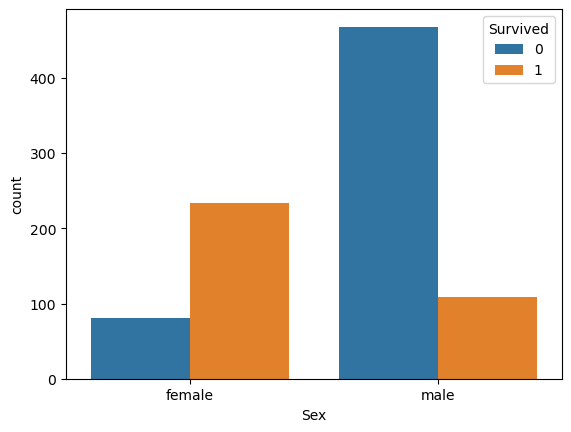

In [22]:
sns.countplot(data=train_df, x='Sex', hue='Survived');

- Remaining Categorical Feature Columns


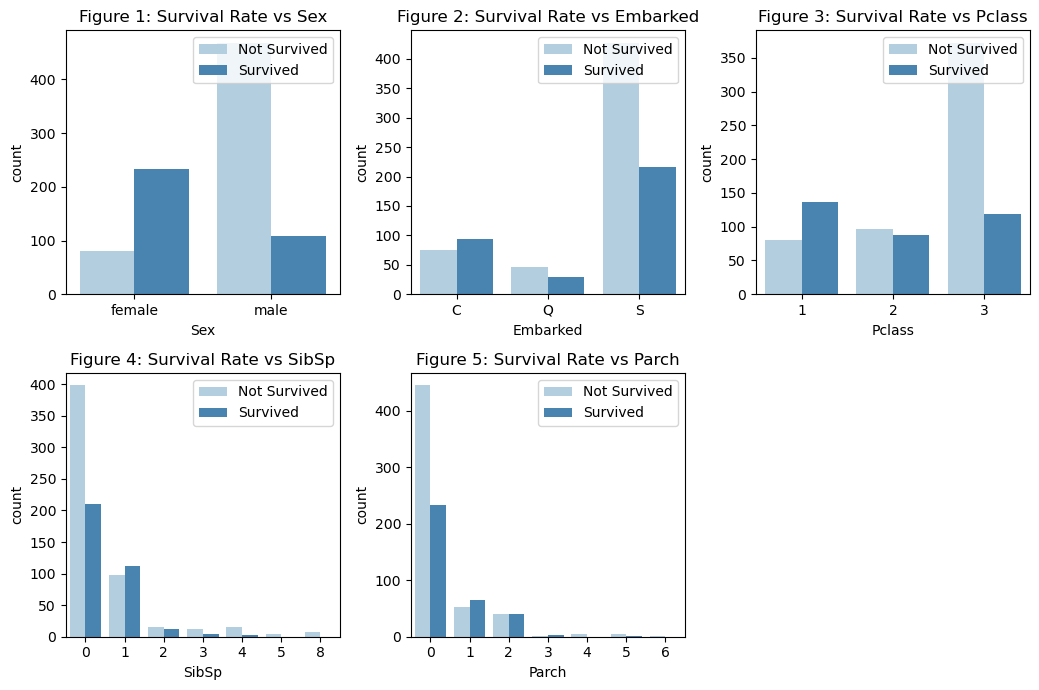

In [23]:
cols =['Sex', 'Embarked', 'Pclass','SibSp','Parch'] 

n_rows=2
n_cols=3

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=r*n_cols+c #index to loop through list 'cols'
        if i< len(cols):
            ax_i=ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived",palette = "Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()


### Observation:
Survival Rate:
* Fig 1: Female survival rate > male
* Fig 2: Most People embarked on Southampton, and also had the highest people not survived
* Fig 3: 1st class higher survival rate
* Fig 4: People going with 0 SibSp are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
* Fig 5: People going with 0 Parch are mostly not survived

## 3.2 EDA for Numerical Features
age, fare

### Age

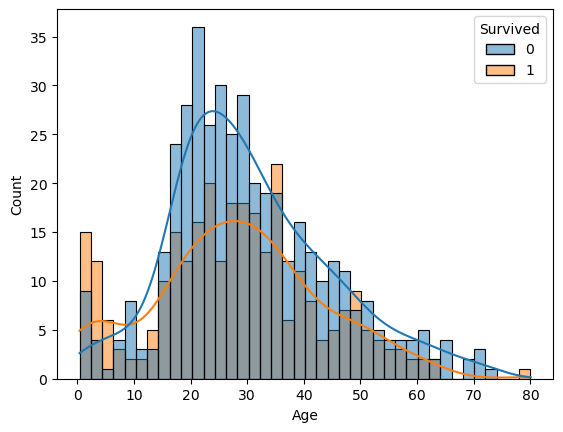

In [24]:
sns.histplot(data=train_df, x='Age',hue ='Survived', bins=40, kde=True);

* Majority passengers were from 18-40 ages
* Children had more chances to survive than other ages

### Fare

In [25]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

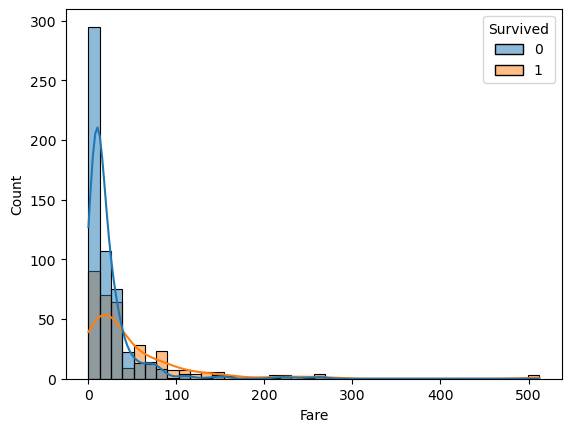

In [26]:
sns.histplot(data=train_df, x='Fare',hue ='Survived', bins=40, kde=True);

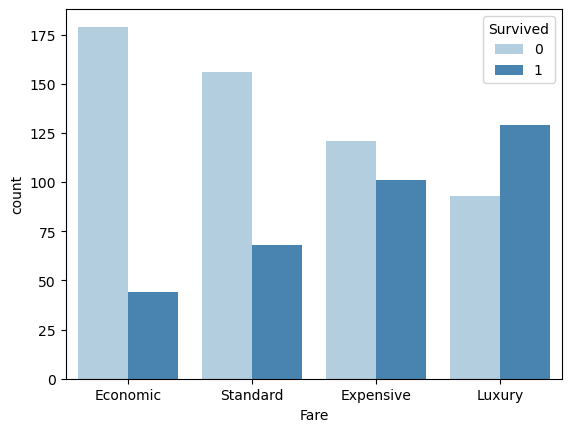

In [27]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

## 4. Feature Engineering & Data Wrangling

### Name 
regular expression

In [28]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [29]:
import re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))

In [30]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [31]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))

In [32]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [33]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

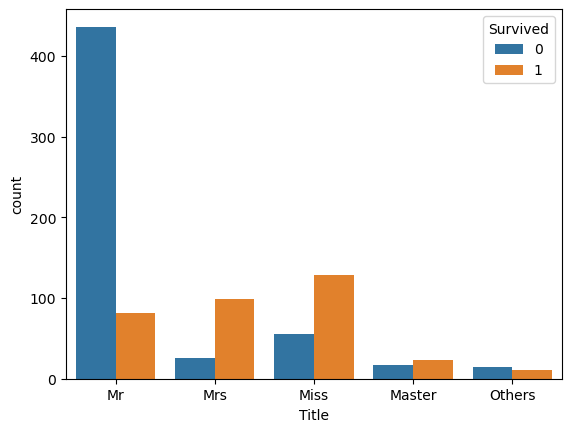

In [34]:
sns.countplot(data=train_df, x='Title', hue='Survived');

## Family


In [35]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')

In [36]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int')

In [37]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large']) 
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium','Large'])

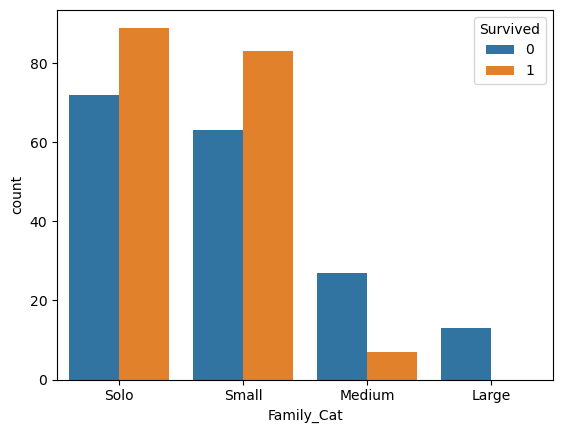

In [38]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

## 4.2 Data Wrangling

In [39]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [40]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Family_Cat has 60.27% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.
Family_Cat has 60.53% missing values.


### Filling missing values
#### Age 
- filling missing values with 'median'

In [41]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']

In [42]:
age_by_sex_pclass


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [43]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [44]:
test_df['Age']=test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [45]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22% missing values.
Family_Cat has 60.27% missing values.
Fare has 0.24% missing values.
Family_Cat has 60.53% missing values.


In [46]:
X = train_df[feature_cols]
y = train_df['Survived']

In [47]:
X.columns

Index(['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat'], dtype='object')

In [48]:
X_test = test_df[feature_cols]

In [49]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [50]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [51]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [52]:
X = preprocessor.transform(X) #X-> X_train, X_val

In [53]:
X_test = preprocessor.transform(X_test)

## 5. Model Training 

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.2)

In [56]:
# binary classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [57]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [58]:
log_reg.score(X_val, Y_val)

0.8491620111731844

In [59]:
y_pred = log_reg.predict(X_val)

In [60]:
precision_score(Y_val,y_pred), recall_score(Y_val, y_pred)

(0.803030303030303, 0.7910447761194029)

In [61]:
print(classification_report(Y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.80      0.79      0.80        67

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [62]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [63]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [64]:
poly_log_reg.score(poly_features_X_val,Y_val)

0.8715083798882681

In [65]:
# Decision tree 
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=2022)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [66]:
decision_tree.score(X_val,Y_val)

0.8379888268156425

 ## 5.1 Cross-validation 

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)
lr_scores = cross_val_score(log_reg_cv, X,y,scoring='accuracy', cv=5)

In [69]:
lr_scores.mean(), lr_scores.std()

(0.8204255853367648, 0.02635371249204157)

In [70]:
dt_scores = cross_val_score(dt_cv, X,y,scoring='accuracy',cv=5)
dt_scores.mean(), dt_scores.std()

(0.7991086560793421, 0.01634784968253844)

## 5.2 Baseline Model Comarison

In [71]:
!pip install xgboost

In [72]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost
seed=2023
models ={
    LinearSVC(max_iter=12000,random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=seed)
}

C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [86]:
import seaborn as sns
%matplotlib inline

In [116]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X,y, metrics, cv=5, plot_results=True):
    # define k-fold:
    kfold = StratifiedKFold(cv,shuffle=True, random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,y,scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
   
    cv_df=pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(data=cv_df,x='model_name', y=f'accuracy_score', color ='lightblue', showmeans=True)

        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
        
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results =pd.concat([mean,std], axis=1, ignore_index=True)
    baseline_results.columns =['Mean', 'Standard deviation']
    
    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results
    
    
   
    
    #return cv_df
generate_baseline_results(models, X,y,metrics='accuracy',cv=5, plot_results=False)
    

C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\giahy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,Mean,Standard deviation
model_name,,
SVC,0.835032,0.023551
XGBClassifier,0.828266,0.013185
LogisticRegression,0.820451,0.039368
LinearSVC,0.813715,0.042159
RandomForestClassifier,0.811437,0.005474
AdaBoostClassifier,0.810345,0.035919
KNeighborsClassifier,0.808066,0.014760
ExtraTreesClassifier,0.800232,0.016536
DecisionTreeClassifier,0.800226,0.026511
